In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import data, color, io
from skimage.transform import hough_circle, hough_circle_peaks, hough_ellipse
from skimage.feature import canny
from skimage.draw import circle_perimeter, ellipse_perimeter
from skimage.color import rgb2hsv, rgb2gray

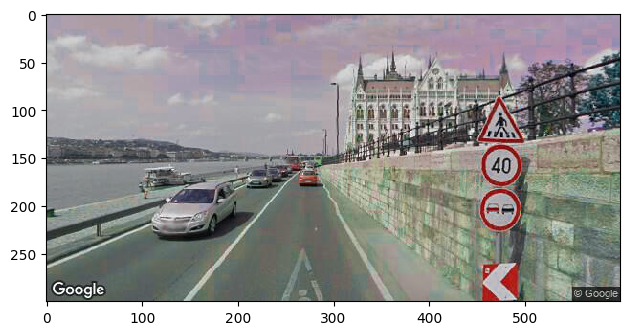

In [1]:
import numpy as np
from skimage import io, color, exposure

# Load the image
image = io.imread(r"C:\Users\loren\Documents\AI_BME\traffic\training_images\7.jpg")

# Convert the image to the HSV color space
hsv_image = color.rgb2hsv(image)

# Extract the red channel (Hue) from the HSV image
red_hue = hsv_image[:, :, 0]

# Perform histogram equalization on the red channel
red_hue_equalized = exposure.equalize_hist(red_hue)

# Replace the red channel with the equalized one in the HSV image
hsv_image[:, :, 0] = red_hue_equalized

# Convert the HSV image back to RGB
enhanced_image = color.hsv2rgb(hsv_image)

# Display the enhanced image
io.imshow(enhanced_image)
io.show()

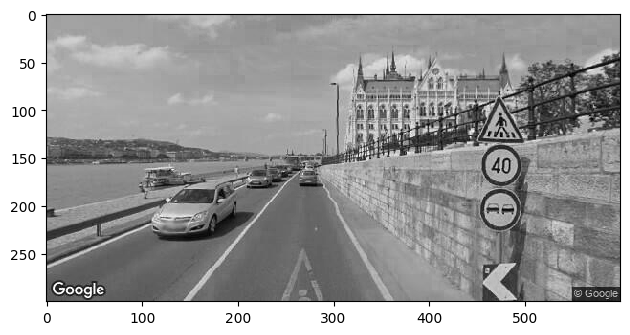

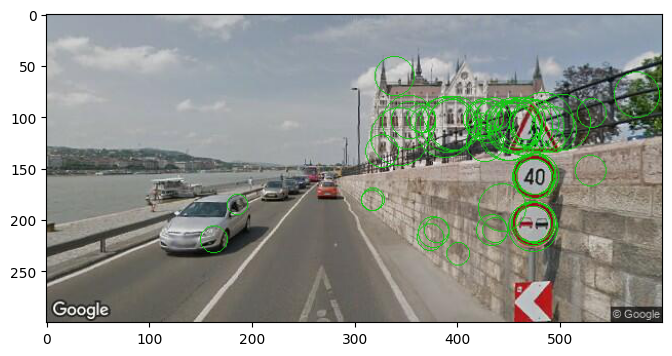

In [7]:
# Load picture
image_rgb = io.imread(r"C:\Users\loren\Documents\AI_BME\traffic\training_images\7.jpg")
# Convert the image to the HSV color space
hsv_image = color.rgb2hsv(image)

# Extract the red channel (Hue) from the HSV image
red_hue = hsv_image[:, :, 0]

# Perform histogram equalization on the red channel
red_hue_equalized = exposure.equalize_hist(red_hue)

# Replace the red channel with the equalized one in the HSV image
hsv_image[:, :, 0] = red_hue_equalized

# Convert the HSV image back to RGB
enhanced_image = color.hsv2rgb(hsv_image)

# Convert the RGB image to grayscale
image_gray = rgb2gray(enhanced_image)

io.imshow(image_gray)
io.show()

edges = canny(image_gray)


# Detect multiple radii
hough_radii = np.arange(10, 30, 1)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles per radius
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image_rgb[circy, circx] = (20, 200, 20)

ax.imshow(image_rgb)
plt.show()

# detect ellipse
# result = hough_ellipse(edges, threshold=8, max_size=90, min_size=10)
# result.tolist()
# rr, cc = ellipse_perimeter(result[1:4])
# image[rr, cc] = (220, 20, 20)

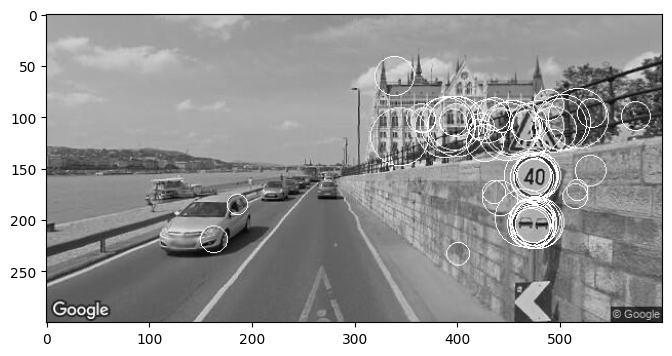

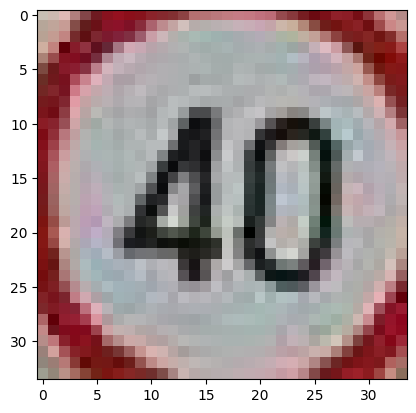

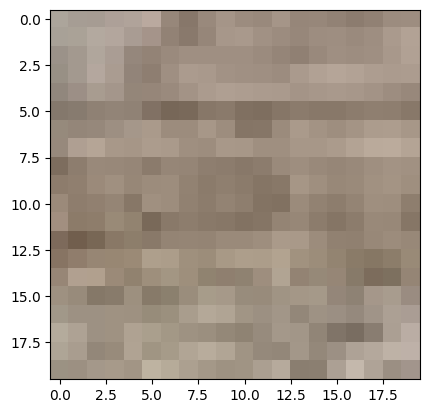

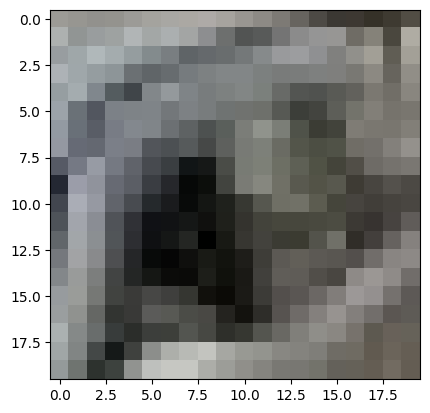

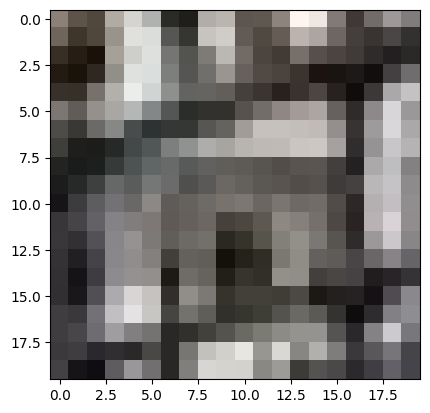

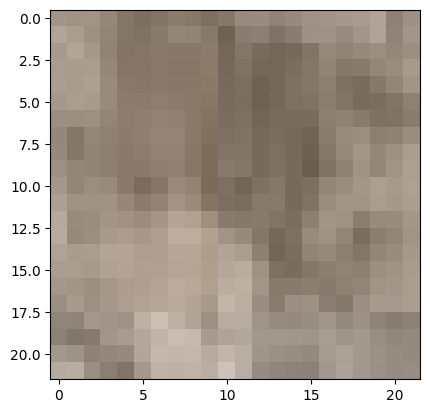

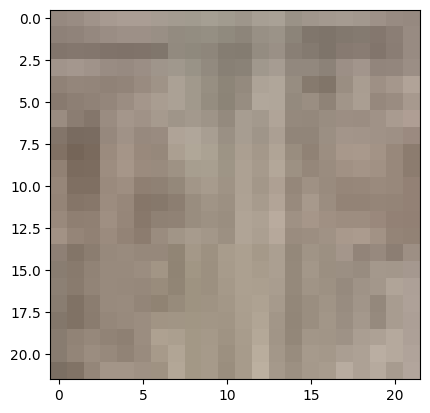

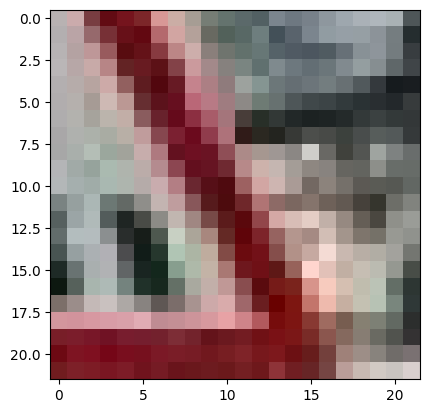

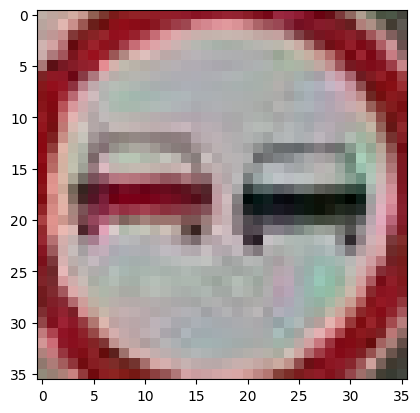

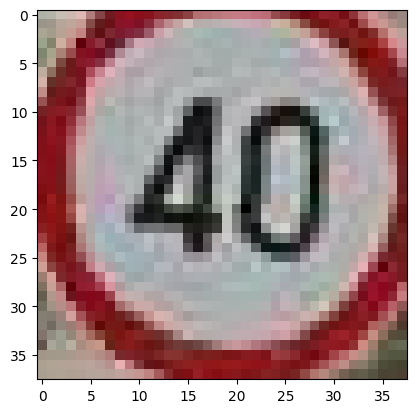

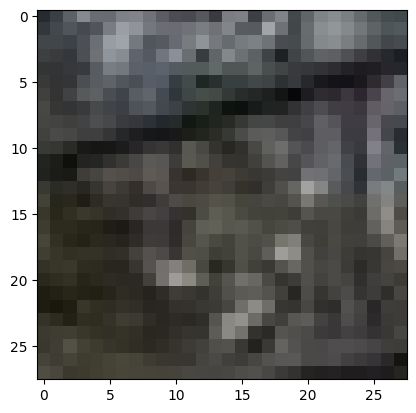

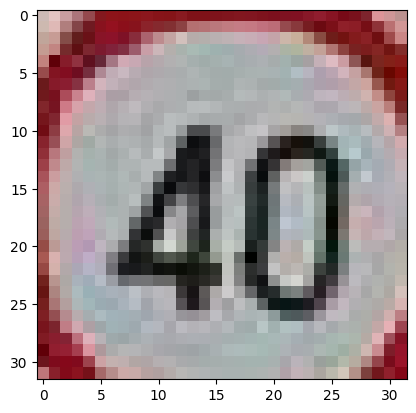

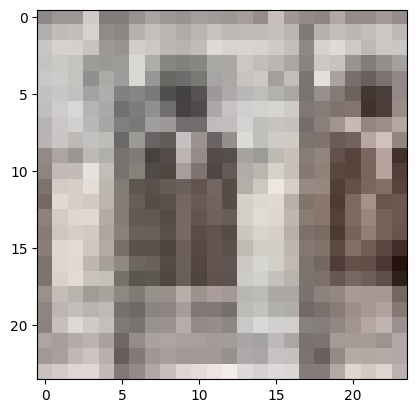

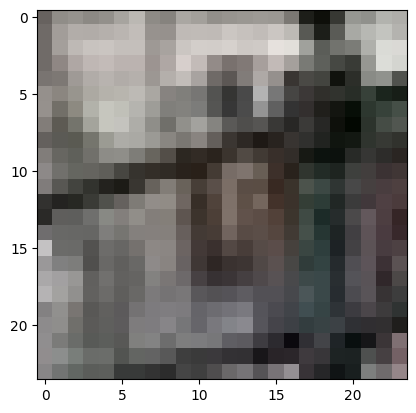

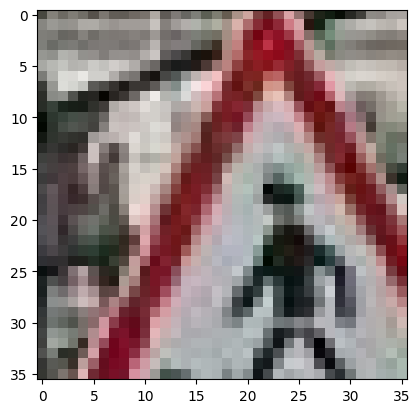

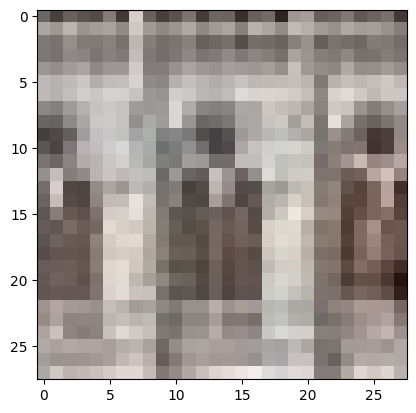

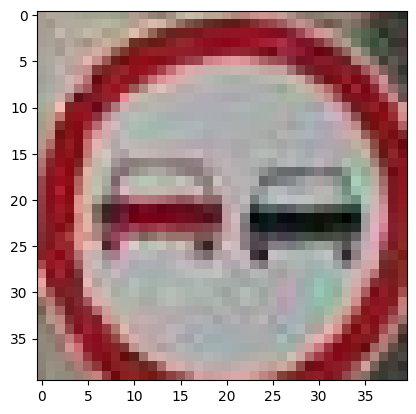

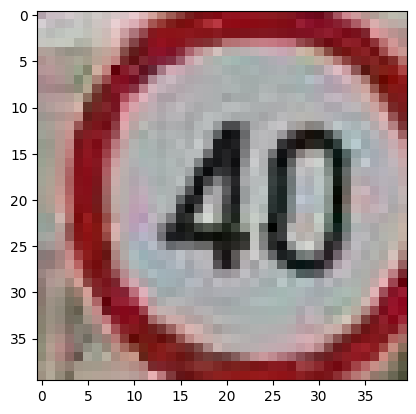

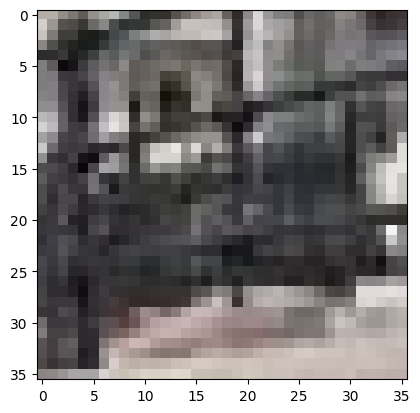

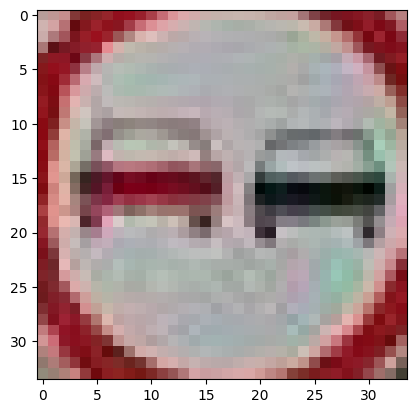

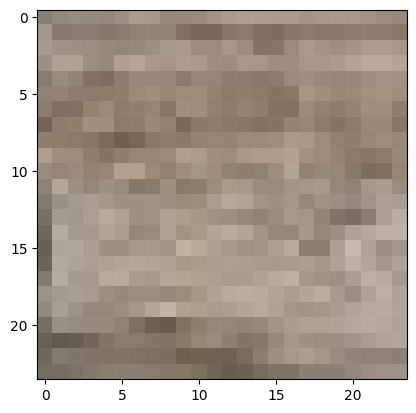

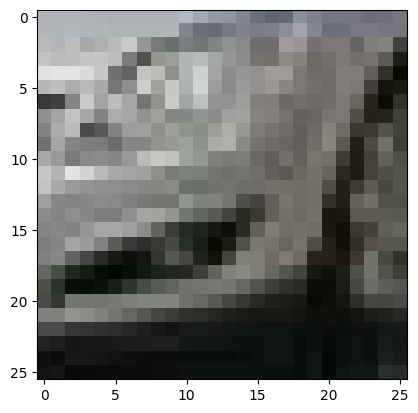

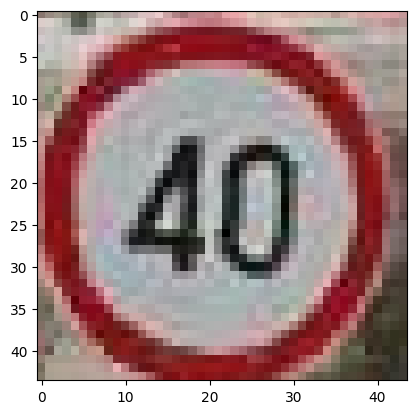

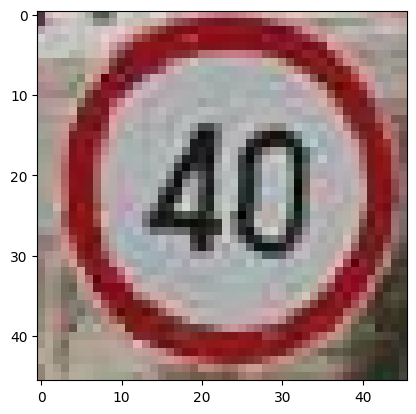

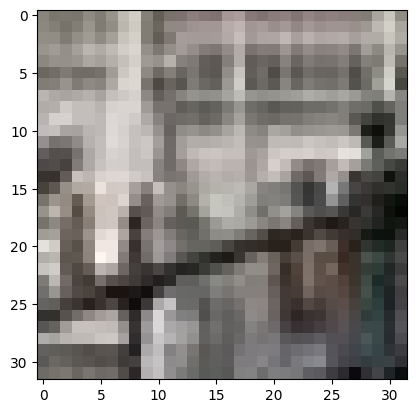

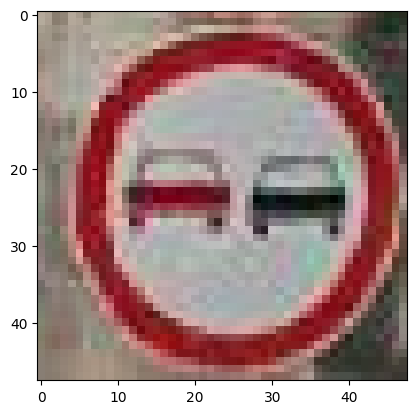

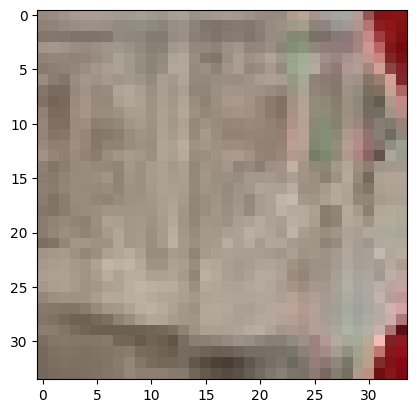

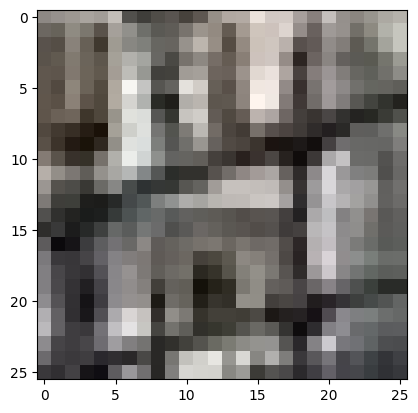

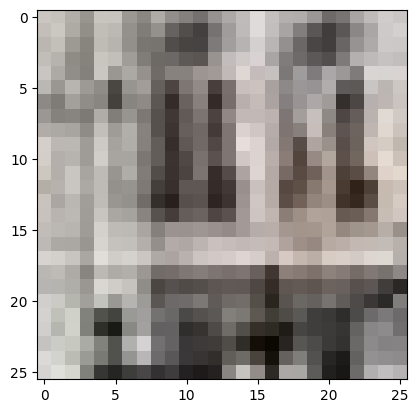

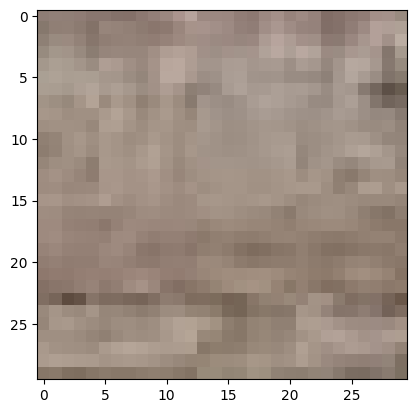

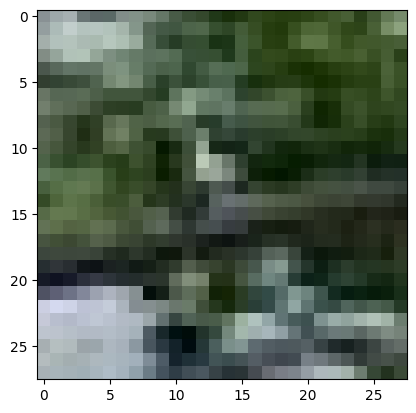

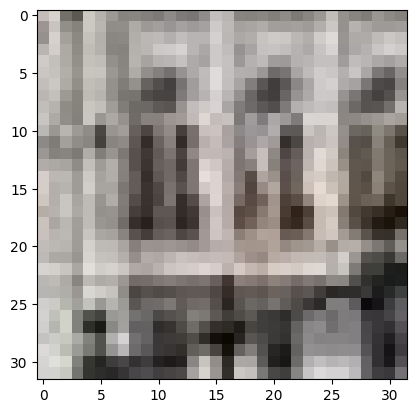

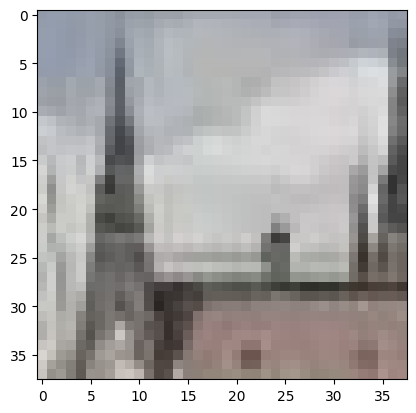

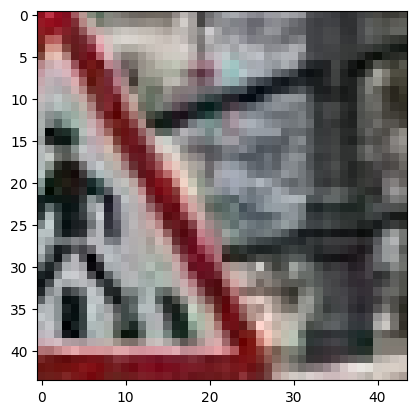

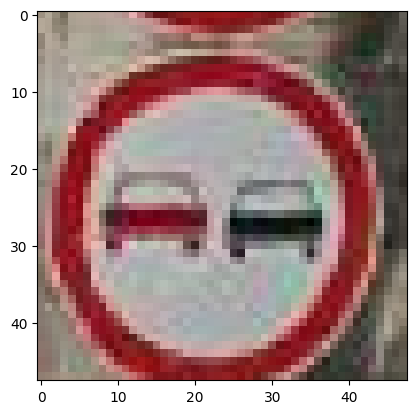

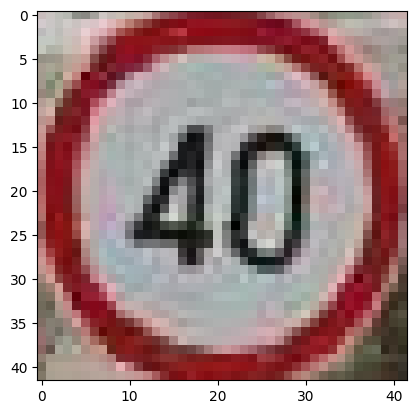

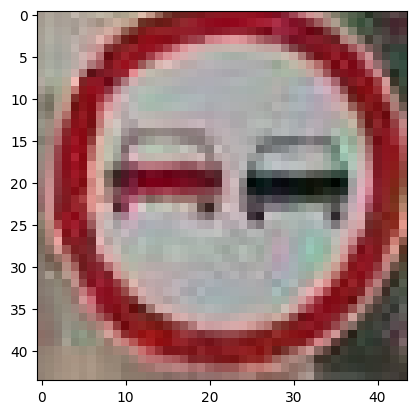

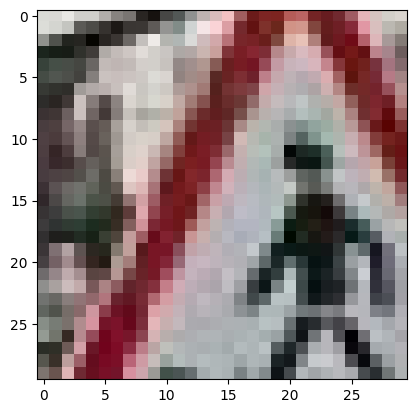

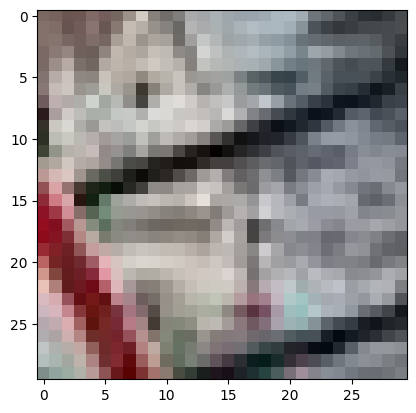

KeyboardInterrupt: ignored

In [11]:
for center_y, center_x, radius in zip(cy, cx, radii):
    small = image_rgb[
        center_y - radius : center_y + radius, center_x - radius : center_x + radius
    ]
    plt.imshow(small)
    plt.show()